https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [1]:
from pandas import read_csv

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'

df = read_csv ( url , header = None , quotechar = "'" ) 

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [4]:
df.dropna( inplace = True )

In [5]:
data = df.values

In [15]:
X = data[ : , : -1 ]

y = data[ : , -1 ]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oe = OrdinalEncoder()

oe.fit( X )

OrdinalEncoder()

In [42]:
X_oe = oe.transform( X )

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

y = le.fit_transform( y )

# Base model

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [33]:
mdl = LogisticRegression( solver='lbfgs' )

cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

n_scores = cross_val_score( mdl , X_oe , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

In [34]:
from numpy import mean

from numpy import std

In [35]:
print( f'accuracy : {mean(n_scores):.3f} ( {std(n_scores):.3f})' )

accuracy : 0.758 ( 0.063)


# Chi-Squared Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [26]:
feat_sel = SelectKBest( score_func = chi2 , k = 'all' )

feat_sel.fit( X_oe , y )

SelectKBest(k='all', score_func=<function chi2 at 0x000000001D0782F0>)

In [28]:
for i in range( len( feat_sel.scores_ ) ) :

    print( f'feature {i} : {feat_sel.scores_[ i ]:.3f}' )

feature 0 : 0.806
feature 1 : 0.873
feature 2 : 6.672
feature 3 : 101.526
feature 4 : 18.458
feature 5 : 15.165
feature 6 : 0.247
feature 7 : 0.665
feature 8 : 10.983


In [29]:
from matplotlib import pyplot

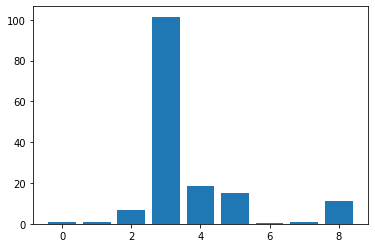

In [30]:
pyplot.bar( [ i for i in range( len( feat_sel.scores_ ) ) ] , feat_sel.scores_ )

pyplot.show()

# Model with chi2 selected features

In [93]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline


from numpy import mean

from numpy import std


from matplotlib import pyplot

In [94]:
def get_models( min_k , max_k ) :

    models = dict()

    for k in range( min_k , max_k + 1  ) :

        oe = OrdinalEncoder()
        
        feat_sel = SelectKBest( score_func = chi2 , k = k )

        mdl = LogisticRegression( solver='lbfgs' )
        
        steps = [ ( 'feat_sel' , feat_sel ) ,
                  ( 'mdl' , mdl ) ]

        models[ 'num_feat_sel_' + str( k ) ] = Pipeline( steps = steps )

    return models

In [95]:
# scores sur X_oe ( et non X )
# Passage OrdonalEncoder dans pipeline problématique : des catégories ne sont pas représentées partout

def evaluate_model( mdl ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    scores = cross_val_score( mdl , X_oe , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [96]:
models = get_models( 1 , X.shape[1] )

results = list()

names = list()

for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( model )
    
    results.append( scores )
    
    print( f'{name} : accuracy : {mean( scores):.3f} ( {std(n_scores):.3f})' ) 

num_feat_sel_1 : accuracy : 0.729 ( 0.063)
num_feat_sel_2 : accuracy : 0.727 ( 0.063)
num_feat_sel_3 : accuracy : 0.755 ( 0.063)
num_feat_sel_4 : accuracy : 0.750 ( 0.063)
num_feat_sel_5 : accuracy : 0.755 ( 0.063)
num_feat_sel_6 : accuracy : 0.743 ( 0.063)
num_feat_sel_7 : accuracy : 0.740 ( 0.063)
num_feat_sel_8 : accuracy : 0.748 ( 0.063)
num_feat_sel_9 : accuracy : 0.758 ( 0.063)


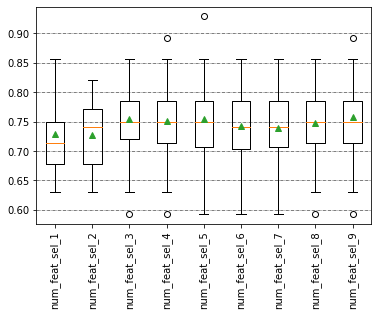

In [97]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color='black', linestyle='-.', linewidth=0.5)

pyplot.xticks( rotation = 90 )

pyplot.show()

> Résultat moins bon du modèle avec sélection de variables vs. modèle sans sélection

# Mutual Information Feature Selection

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
feat_sel = SelectKBest( score_func = mutual_info_classif , k = 'all' )

feat_sel.fit( X_oe , y )

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000000001D1F2598>)

In [56]:
for i in range( len( feat_sel.scores_ ) ) :

    print( f'feature {i} : {feat_sel.scores_[ i ]:.3f}' )

feature 0 : 0.005
feature 1 : 0.004
feature 2 : 0.003
feature 3 : 0.012
feature 4 : 0.060
feature 5 : 0.048
feature 6 : 0.000
feature 7 : 0.013
feature 8 : 0.038


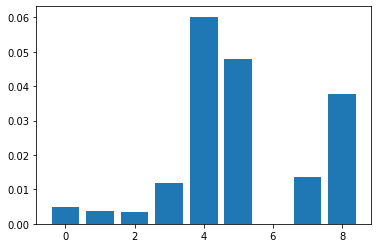

In [57]:
pyplot.bar( [ i for i in range( len( feat_sel.scores_ ) ) ] , feat_sel.scores_ )

pyplot.show()

# Model with mutual information selected features

In [83]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline


from numpy import mean

from numpy import std


from matplotlib import pyplot

In [88]:
def get_models( min_k , max_k ) :

    models = dict()

    for k in range( min_k , max_k + 1  ) :

        oe = OrdinalEncoder()
        
        feat_sel = SelectKBest( score_func = mutual_info_classif , k = k )

        mdl = LogisticRegression( solver='lbfgs' )
        
        steps = [ ( 'feat_sel' , feat_sel ) ,
                  ( 'mdl' , mdl ) ]

        models[ 'num_feat_sel_' + str( k ) ] = Pipeline( steps = steps )

    return models

In [89]:
# scores sur X_oe ( et non X )
# Passage OrdonalEncoder dans pipeline problématique : des catégories ne sont pas représentées partout

def evaluate_model( mdl ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    scores = cross_val_score( mdl , X_oe , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [90]:
models = get_models( 1 , X.shape[1] )

results = list()

names = list()

for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( model )
    
    results.append( scores )
    
    print( f'{name} : accuracy : {mean( scores):.3f} ( {std(n_scores):.3f})' ) 

num_feat_sel_1 : accuracy : 0.701 ( 0.063)
num_feat_sel_2 : accuracy : 0.717 ( 0.063)
num_feat_sel_3 : accuracy : 0.740 ( 0.063)
num_feat_sel_4 : accuracy : 0.732 ( 0.063)
num_feat_sel_5 : accuracy : 0.744 ( 0.063)
num_feat_sel_6 : accuracy : 0.755 ( 0.063)
num_feat_sel_7 : accuracy : 0.753 ( 0.063)
num_feat_sel_8 : accuracy : 0.761 ( 0.063)
num_feat_sel_9 : accuracy : 0.758 ( 0.063)


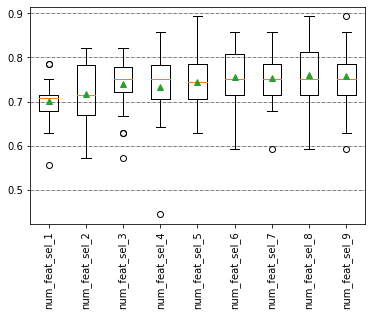

In [92]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color='black', linestyle='-.', linewidth=0.5)

pyplot.xticks( rotation = 90 )

pyplot.show()

> Modèle avec sélection de 8 variables meilleur que modèle sans sélection